In [115]:
# Trabajar con DataFrames
# -----------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [86]:
df_jugadores=pd.read_csv(f'../../data/transformed/stats_jugadores_transformed.csv')
df_info=pd.read_csv(f'../../data/transformed/info_clubes_transformed.csv')
clasificaciones_df=pd.read_csv(f'../../data/transformed/clasificaciones_premier_transformed.csv')
asistencia_df=pd.read_csv(f'../../data/transformed/asistencia_estadios_transformed.csv')
df_clubes=pd.read_csv(f'../../data/transformed/clubes.csv')

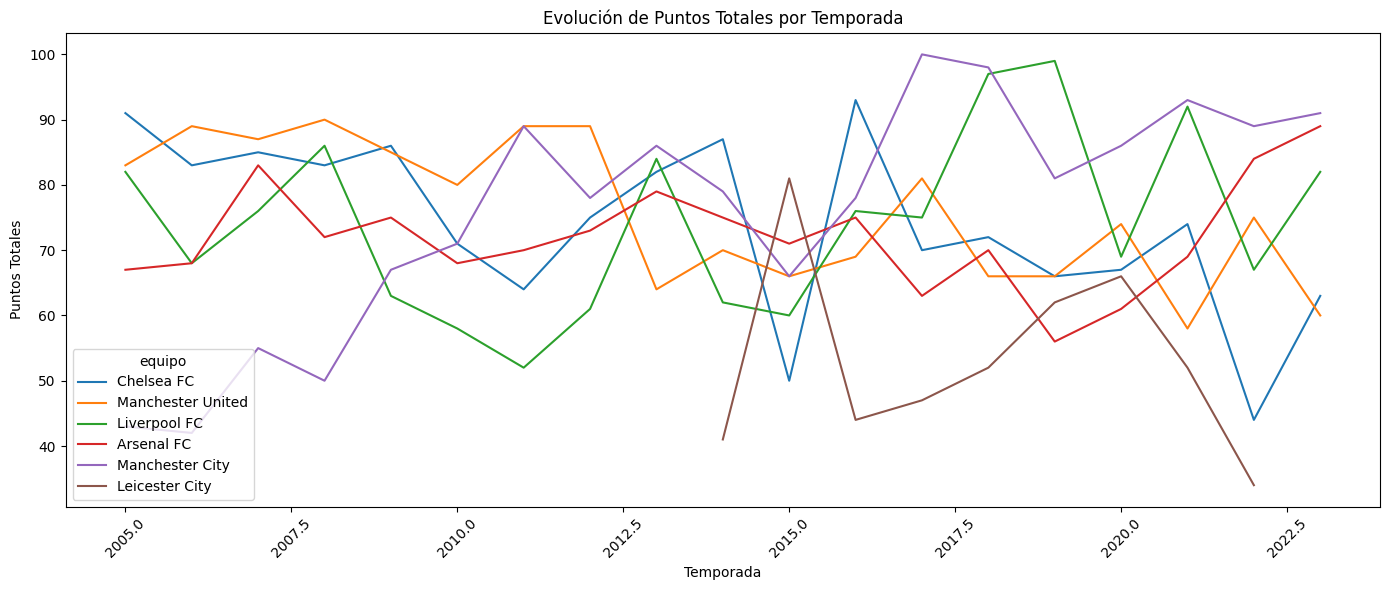

In [88]:
Equipos_seleccionados = ['Arsenal FC', 'Manchester United', 'Manchester City', 'Liverpool FC', 'Chelsea FC','Leicester City']
datos_filtrados = clasificaciones_df[clasificaciones_df['equipo'].isin(Equipos_seleccionados)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=datos_filtrados, x='temporada', y='puntos_total', hue='equipo')
plt.title('Evolución de Puntos Totales por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Puntos Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La gráfica muestra la evolución de los puntos totales obtenidos por varios equipos de la Premier League en distintas temporadas.

Puntos clave:

- Manchester City y Liverpool FC muestran una tendencia al alza en las últimas temporadas, destacándose como equipos dominantes.
- Manchester United y Chelsea FC presentan fluctuaciones significativas, pero suelen mantenerse en los niveles altos de la tabla.
- Arsenal FC muestra una recuperación en las temporadas recientes tras un periodo de rendimiento más bajo.
- Leicester City, tras su sorprendente título en 2015-2016, muestra un descenso en los puntos en las temporadas siguientes.

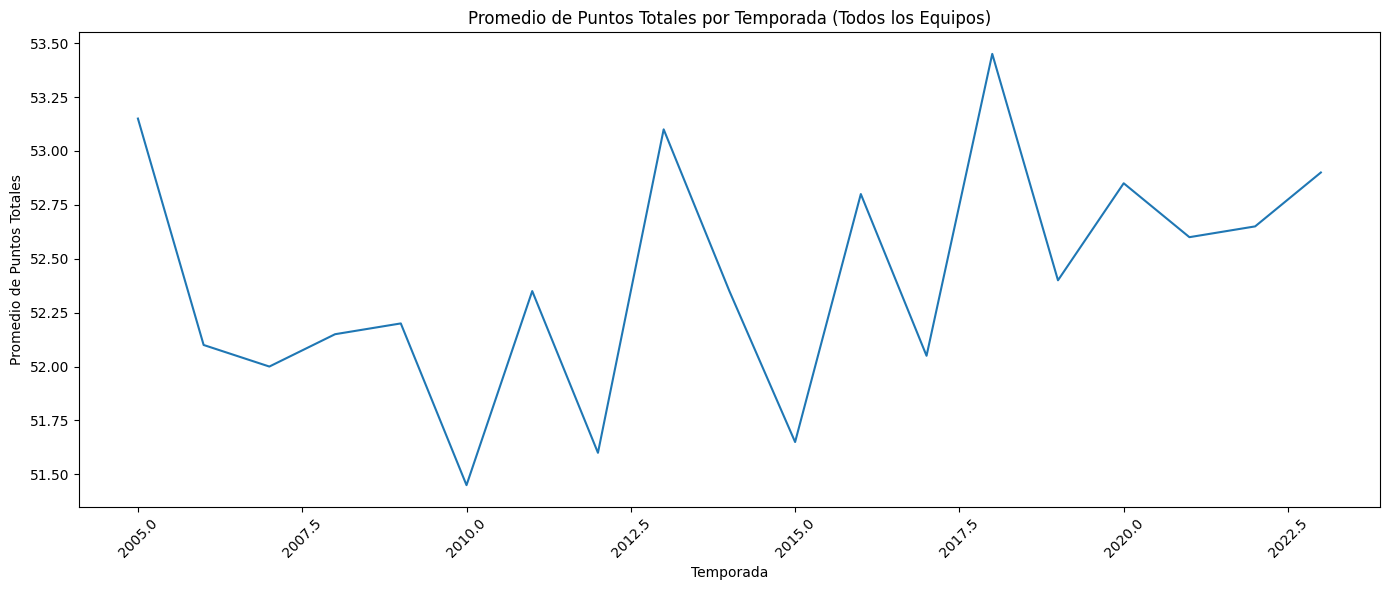

In [89]:
media_puntos_temporada = clasificaciones_df.groupby('temporada')['puntos_total'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=media_puntos_temporada, x='temporada', y='puntos_total')
plt.title('Promedio de Puntos Totales por Temporada (Todos los Equipos)')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- El promedio de puntos muestra una ligera fluctuación a lo largo de las temporadas.
- Hubo un descenso en las temporadas iniciales, seguido de cierta estabilidad y una tendencia al alza en las temporadas más recientes.
- Las variaciones podrían reflejar cambios en el equilibrio competitivo de la liga, donde algunos equipos dominan en ciertas temporadas, afectando el promedio general.

C:\Users\alexc\AppData\Local\Temp\ipykernel_3700\1151882078.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_por_temporada = clasificaciones_df.groupby('temporada').apply(lambda x: x.nsmallest(3, 'posicion'))
C:\Users\alexc\AppData\Local\Temp\ipykernel_3700\1151882078.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_3_por_temporada = clasificaciones_df.groupby('temporada').apply(lambda x:

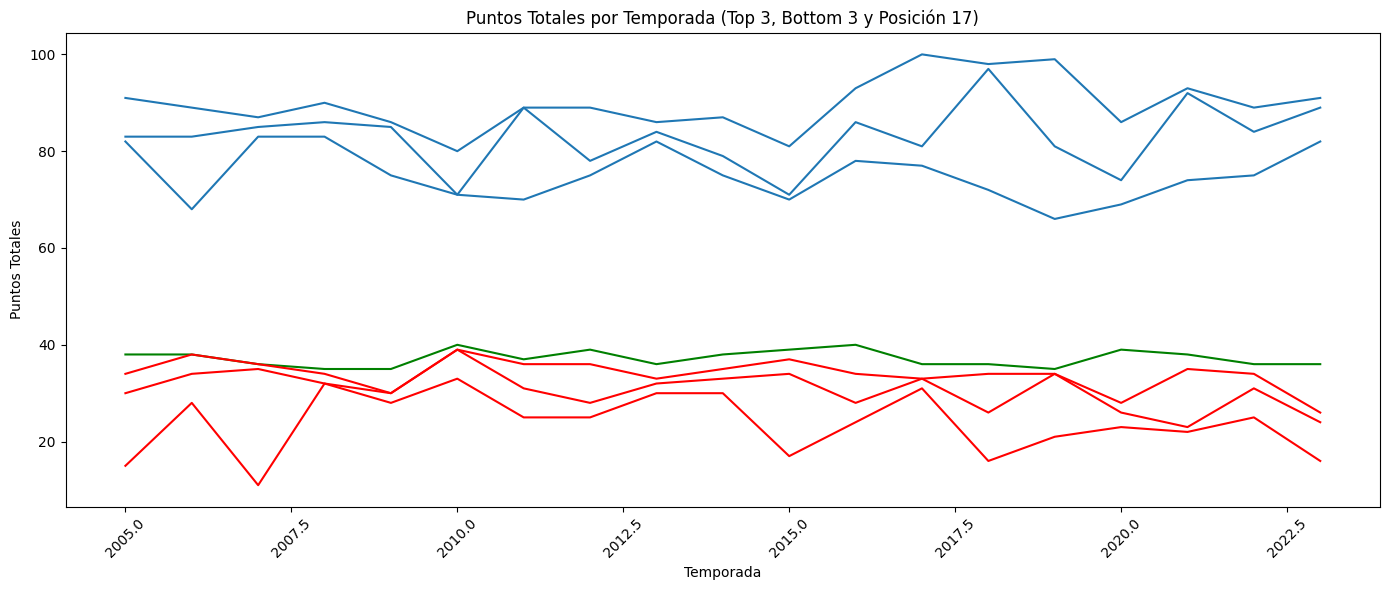

In [133]:
# Filtrar los 3 primeros y 3 últimos equipos por temporada
top_3_por_temporada = clasificaciones_df.groupby('temporada').apply(lambda x: x.nsmallest(3, 'posicion'))
bottom_3_por_temporada = clasificaciones_df.groupby('temporada').apply(lambda x: x.nlargest(3, 'posicion'))

# Filtrar el equipo en la posición 17 por temporada
posicion_17_por_temporada = clasificaciones_df[clasificaciones_df['posicion'] == 17]

# Combinar los datos de los equipos seleccionados
combined_points_seasonal = pd.concat([top_3_por_temporada, bottom_3_por_temporada, posicion_17_por_temporada]).reset_index(drop=True)

# Colorear los gráficos según la posición
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=combined_points_seasonal,
    x='temporada',
    y='puntos_total',
    hue='posicion',
    palette={**{p: 'red' for p in bottom_3_por_temporada['posicion'].unique()},
             17: 'green',
             **{p: 'tab:blue' for p in top_3_por_temporada['posicion'].unique()}},
    legend=False
)

# Configurar el gráfico
plt.title('Puntos Totales por Temporada (Top 3, Bottom 3 y Posición 17)')
plt.xlabel('Temporada')
plt.ylabel('Puntos Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Top 3 (líneas azules): Mantienen un alto rendimiento, con puntos totales generalmente por encima de 80. Muestran una tendencia ligeramente ascendente en las últimas temporadas.
- Bottom 3 (líneas rojas): Los equipos en las últimas posiciones tienen puntos consistentemente bajos, por debajo de 30, con poca variabilidad.
- Posición 17 (línea verde): Se mantiene alrededor de los 35-40 puntos, con ligeras variaciones, indicando la línea entre la supervivencia en la liga y el descenso.

La diferencia entre el Top 3 y el Bottom 3 resalta la brecha de rendimiento en la liga, mientras que la estabilidad en la posición 17 sugiere un umbral constante para evitar el descenso.

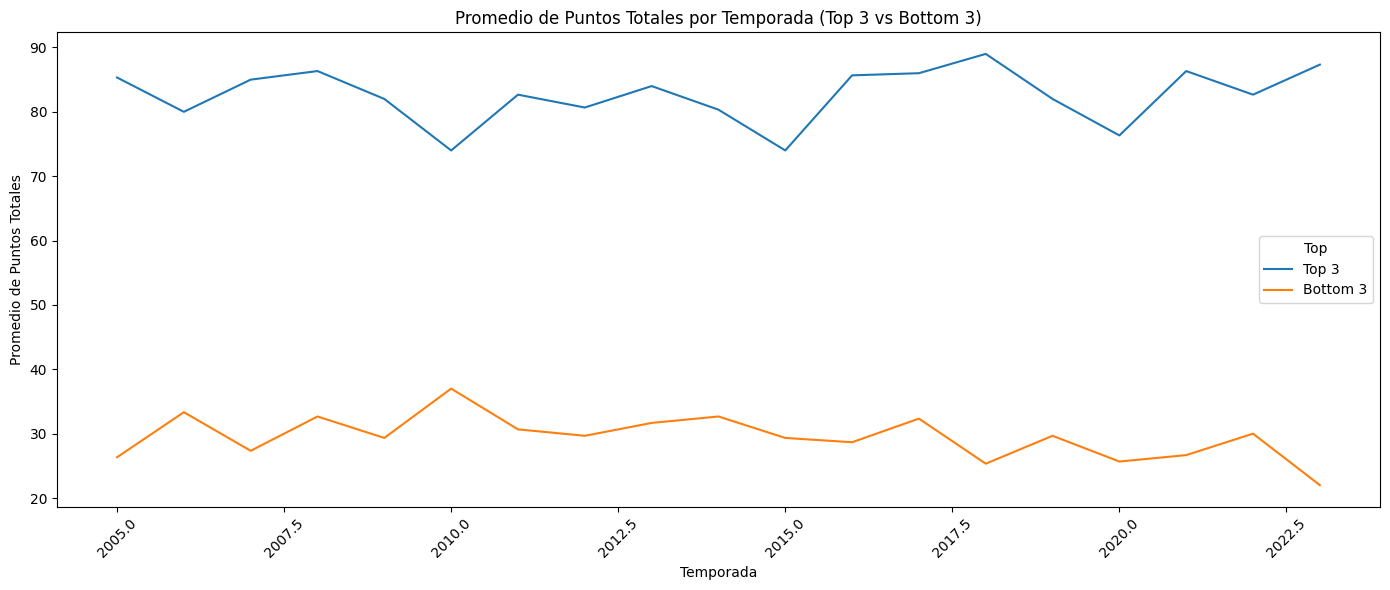

In [90]:
top_teams = clasificaciones_df[clasificaciones_df['posicion'].between(1, 3)].groupby('temporada')['puntos_total'].mean().reset_index()
top_teams['Top'] = 'Top 3'

bottom_teams = clasificaciones_df[clasificaciones_df['posicion'].between(18, 20)].groupby('temporada')['puntos_total'].mean().reset_index()
bottom_teams['Top'] = 'Bottom 3'

combined_average_top_bottom_3 = pd.concat([top_teams, bottom_teams]).reset_index(drop=True)

plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_average_top_bottom_3, x='temporada', y='puntos_total', hue='Top')
plt.title('Promedio de Puntos Totales por Temporada (Top 3 vs Bottom 3)')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Puntos Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Top 3 (línea azul): Mantienen consistentemente un promedio de puntos alto, alrededor de los 80-90 puntos, con una ligera tendencia al alza en las últimas temporadas.
- Bottom 3 (línea naranja): Muestran un promedio de puntos mucho más bajo, alrededor de los 20-30 puntos, con pocas variaciones significativas a lo largo del tiempo.

La brecha entre el Top 3 y Bottom 3 es evidente y constante, reflejando la diferencia en el rendimiento y competitividad entre los mejores y los peores equipos de la liga.

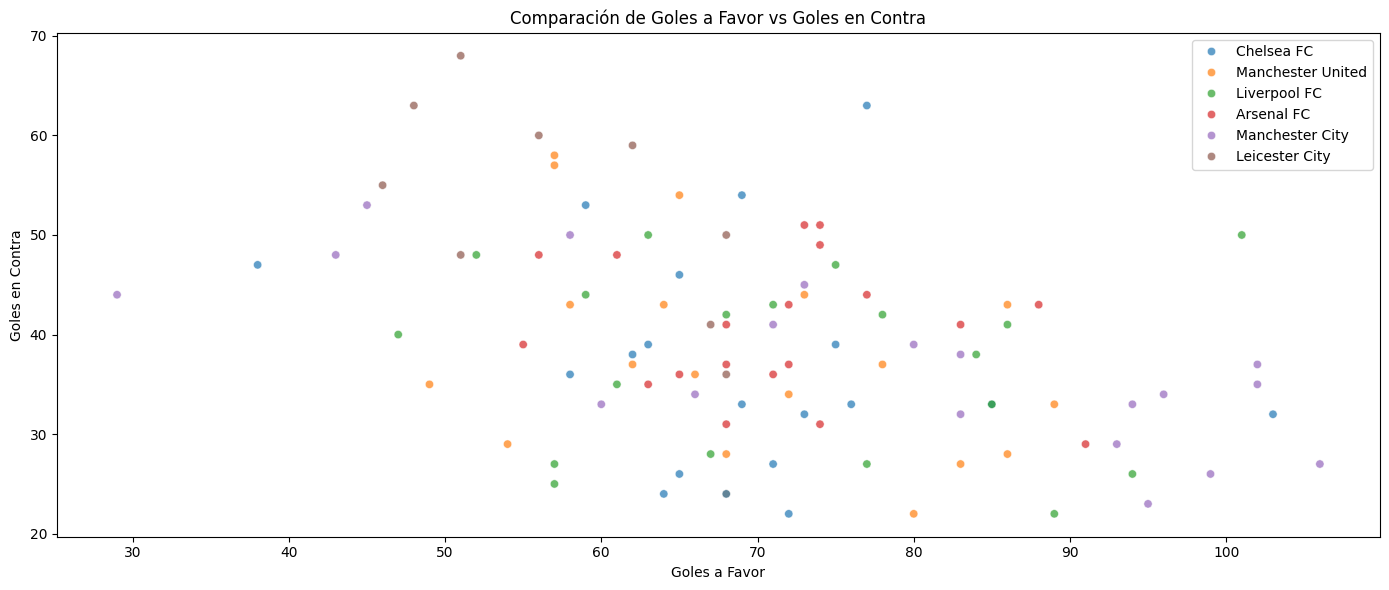

In [91]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=datos_filtrados, x='goles_favor_total', y='goles_contra_total', hue='equipo', alpha=0.7)
plt.title('Comparación de Goles a Favor vs Goles en Contra')
plt.xlabel('Goles a Favor')
plt.ylabel('Goles en Contra')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Tendencia general: Los equipos que anotan más goles a favor tienden a recibir menos goles en contra, lo que refleja un equilibrio entre ataque y defensa.

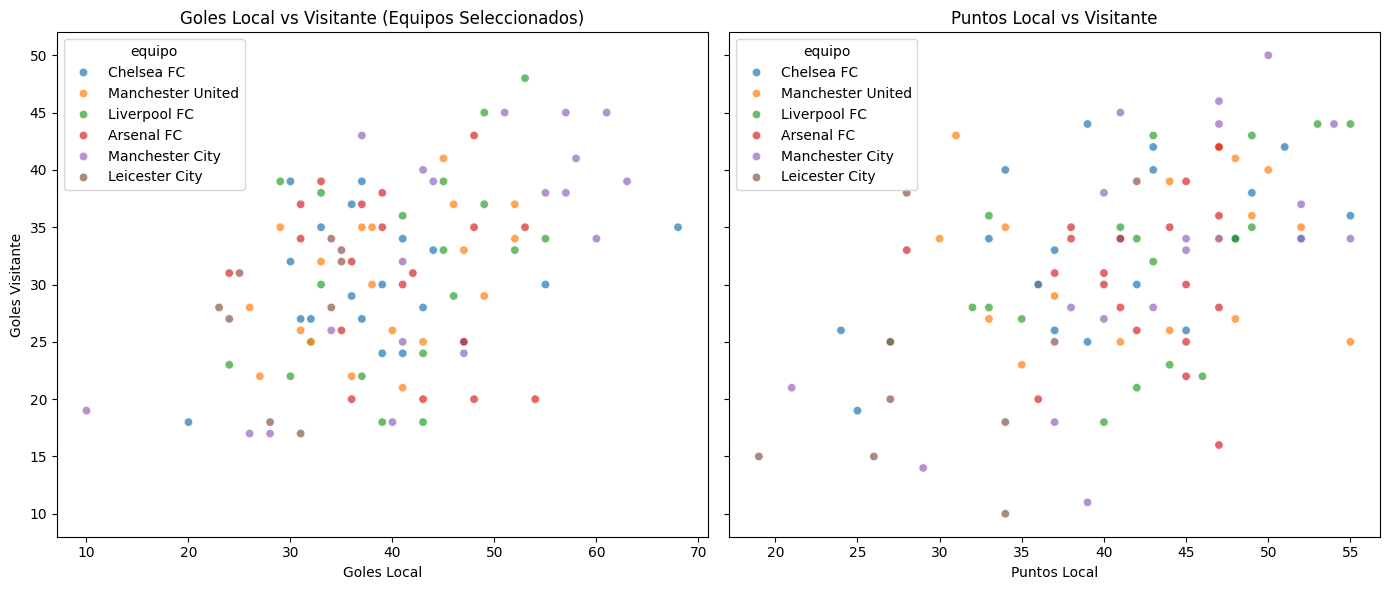

In [92]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.scatterplot(data=datos_filtrados, x='goles_favor_local', y='goles_favor_visitante', hue='equipo', alpha=0.7, ax=ax[0])
ax[0].set_title('Goles Local vs Visitante (Equipos Seleccionados)')
ax[0].set_xlabel('Goles Local')
ax[0].set_ylabel('Goles Visitante')

sns.scatterplot(data=datos_filtrados, x='puntos_local', y='puntos_visitante', hue='equipo', alpha=0.7, ax=ax[1])
ax[1].set_title('Puntos Local vs Visitante')
ax[1].set_xlabel('Puntos Local')
ax[1].set_ylabel('Puntos Visitante')

plt.tight_layout()
plt.show()


Goles Local vs Visitante (izquierda):

- Hay una dispersión notable en los goles anotados en casa versus fuera de casa.

Puntos Local vs Visitante (derecha):

- La mayoría de los equipos obtienen más puntos en casa que como visitantes.
- Los equipos con menor desempeño suelen mostrar una mayor diferencia entre puntos en casa y fuera.

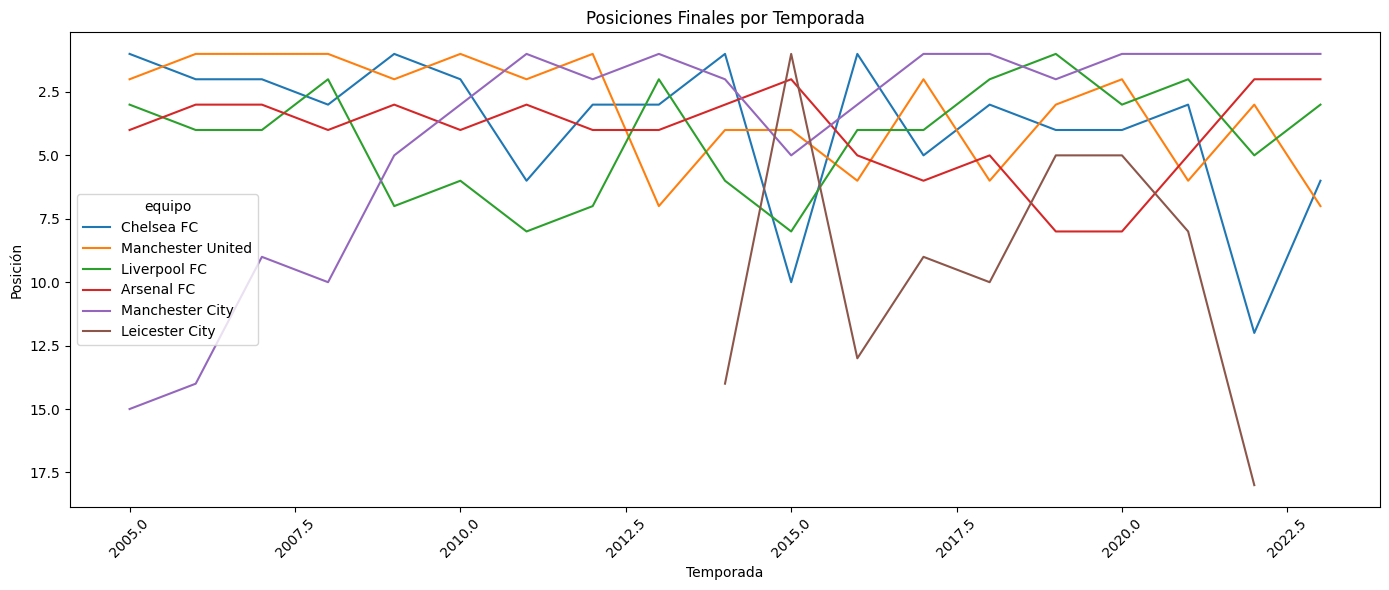

In [93]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=datos_filtrados, x='temporada', y='posicion', hue='equipo')
plt.title('Posiciones Finales por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Posición')
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

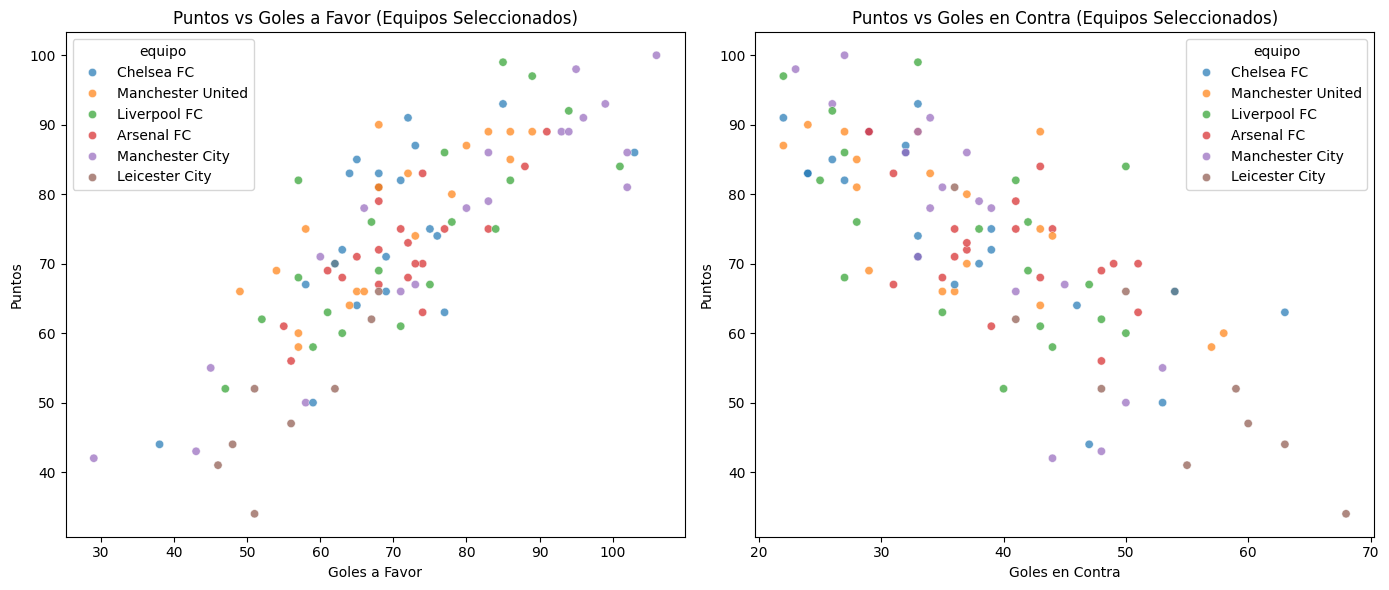

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=datos_filtrados, x='goles_favor_total', y='puntos_total', hue='equipo', alpha=0.7, ax=ax[0])
ax[0].set_title('Puntos vs Goles a Favor (Equipos Seleccionados)')
ax[0].set_xlabel('Goles a Favor')
ax[0].set_ylabel('Puntos')

sns.scatterplot(data=datos_filtrados, x='goles_contra_total', y='puntos_total', hue='equipo', alpha=0.7, ax=ax[1])
ax[1].set_title('Puntos vs Goles en Contra (Equipos Seleccionados)')
ax[1].set_xlabel('Goles en Contra')
ax[1].set_ylabel('Puntos')

plt.tight_layout()
plt.show()


Puntos vs Goles a Favor (izquierda):

- Existe una correlación positiva clara: a medida que los equipos anotan más goles, tienden a obtener más puntos.

Puntos vs Goles en Contra (derecha):

- Aquí la correlación es negativa: a medida que un equipo recibe más goles, tiende a obtener menos puntos.


<Figure size 1000x600 with 0 Axes>

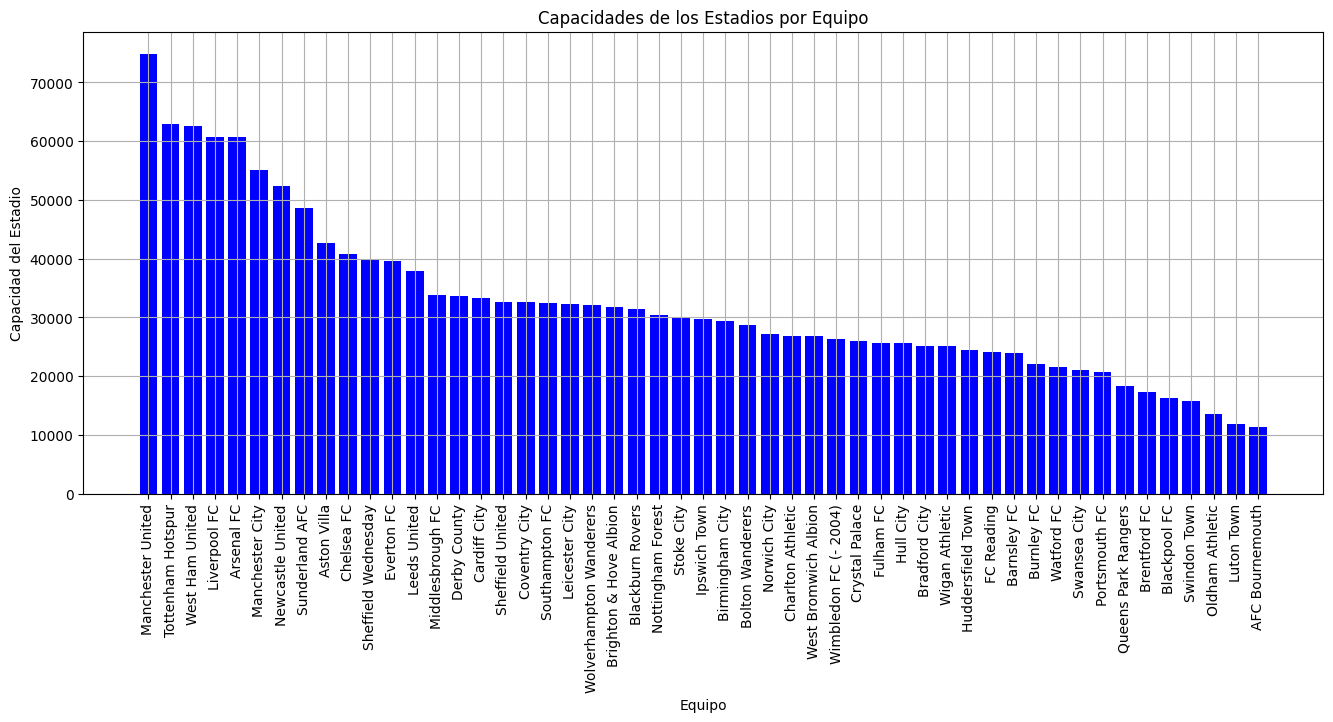

In [156]:
# Ordenar los datos por capacidad
asistencia_df_ordenada = asistencia_df.sort_values(by='Capacidad', ascending=False)

# Crear el gráfico de capacidades de los estadios por equipo
plt.figure()
plt.figure(figsize=(16, 6))
plt.bar(asistencia_df_ordenada['Equipo'], asistencia_df_ordenada['Capacidad'], color='blue')
plt.xticks(rotation=90)
plt.title('Capacidades de los Estadios por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Capacidad del Estadio')
plt.grid(True)
plt.show()

- Manchester United tiene el estadio con la mayor capacidad, superando los 70,000 asientos.

- Equipos como Tottenham Hotspur, West Ham United, Liverpool FC, y Arsenal FC también cuentan con estadios de gran capacidad, entre 50,000 y 60,000 asientos.

- Hacia el otro extremo, equipos como AFC Bournemouth y Oldham Athletic tienen estadios con capacidades significativamente menores, alrededor de los 10,000 asientos.

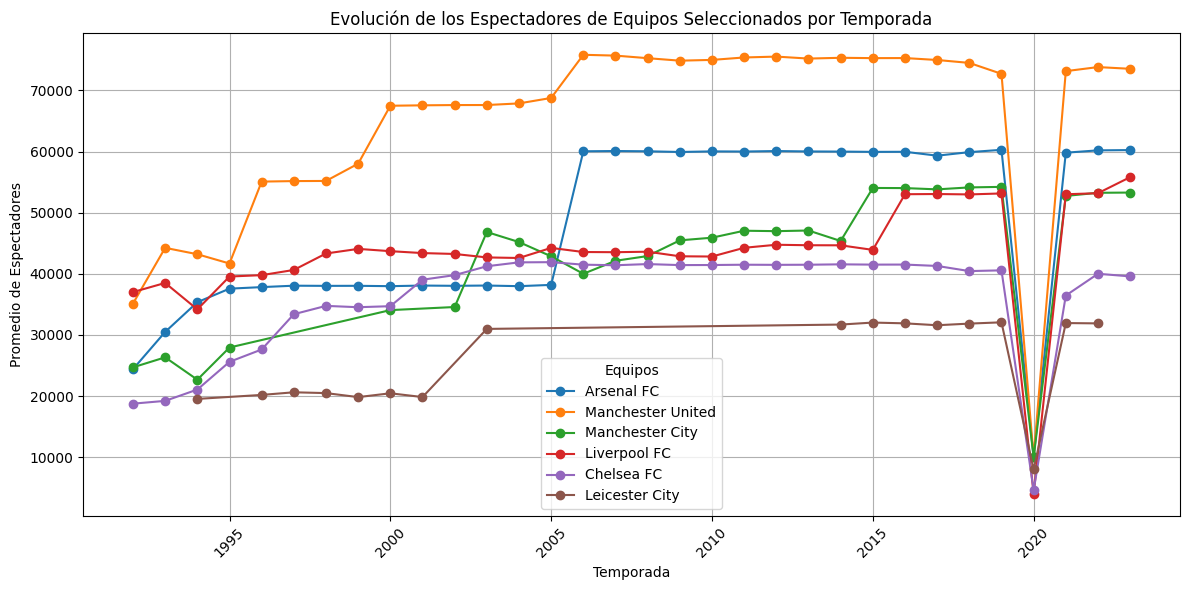

In [95]:
datos_filtrados = asistencia_df[asistencia_df['Equipo'].isin(Equipos_seleccionados)]

plt.figure(figsize=(12, 6))

for team in Equipos_seleccionados:
    team_data = datos_filtrados[datos_filtrados['Equipo'] == team]
    plt.plot(team_data['Temporada'], team_data['Promedio'], marker='o', label=team)

plt.title('Evolución de los Espectadores de Equipos Seleccionados por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Espectadores')
plt.xticks(rotation=45)  
plt.grid()
plt.legend(title='Equipos')
plt.tight_layout()
plt.show()

- Manchester United domina consistentemente con el mayor promedio de espectadores, alcanzando más de 70,000 en temporadas recientes.

- Arsenal FC, Liverpool FC, y Manchester City muestran un aumento constante en la asistencia a lo largo de los años, estabilizándose en torno a los 50,000-60,000 espectadores.

- Leicester City y Chelsea FC tienen cifras más bajas en comparación, pero también presentan crecimiento, especialmente después de sus éxitos recientes.

- La caída abrupta en la asistencia alrededor de 2020 coincide con las restricciones por la pandemia de COVID-19, reflejando el impacto global en el deporte.

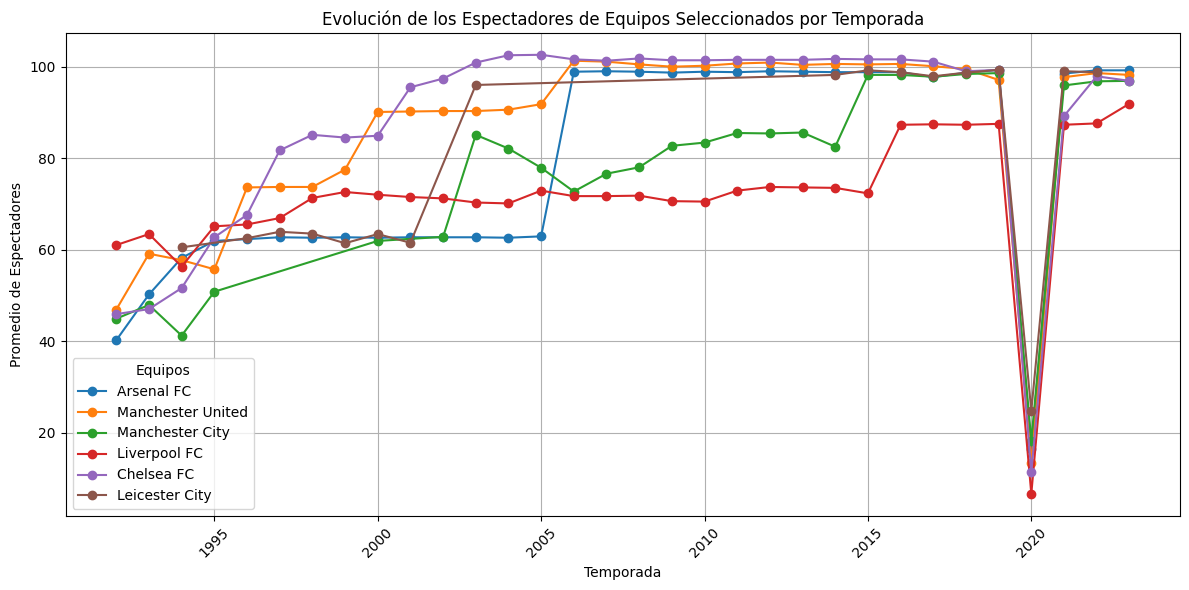

In [ ]:
datos_filtrados = asistencia_df[asistencia_df['Equipo'].isin(Equipos_seleccionados)]

plt.figure(figsize=(12, 6))

for team in Equipos_seleccionados:
    team_data = datos_filtrados[datos_filtrados['Equipo'] == team]
    plt.plot(team_data['Temporada'], team_data['Máximo rendimiento'], marker='o', label=team)

plt.title('Evolución de los rendimiento de espectadores de Equipos Seleccionados por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Espectadores')
plt.xticks(rotation=45)  
plt.grid()
plt.legend(title='Equipos')
plt.tight_layout()
plt.show()

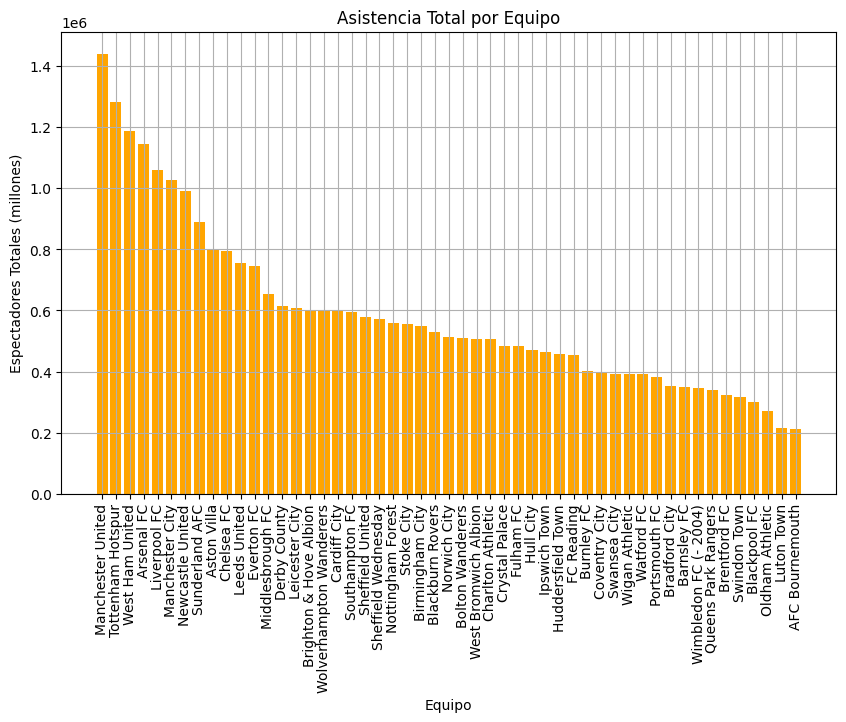

In [139]:
# Comparación de asistencia total por equipo
plt.figure()
asistencia_df_ordenada = asistencia_df.sort_values(by='Espectadores', ascending=False)
plt.bar(asistencia_df_ordenada['Equipo'], asistencia_df_ordenada['Espectadores'], color='orange')
plt.xticks(rotation=90)
plt.title('Asistencia Total por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Espectadores Totales (millones)')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

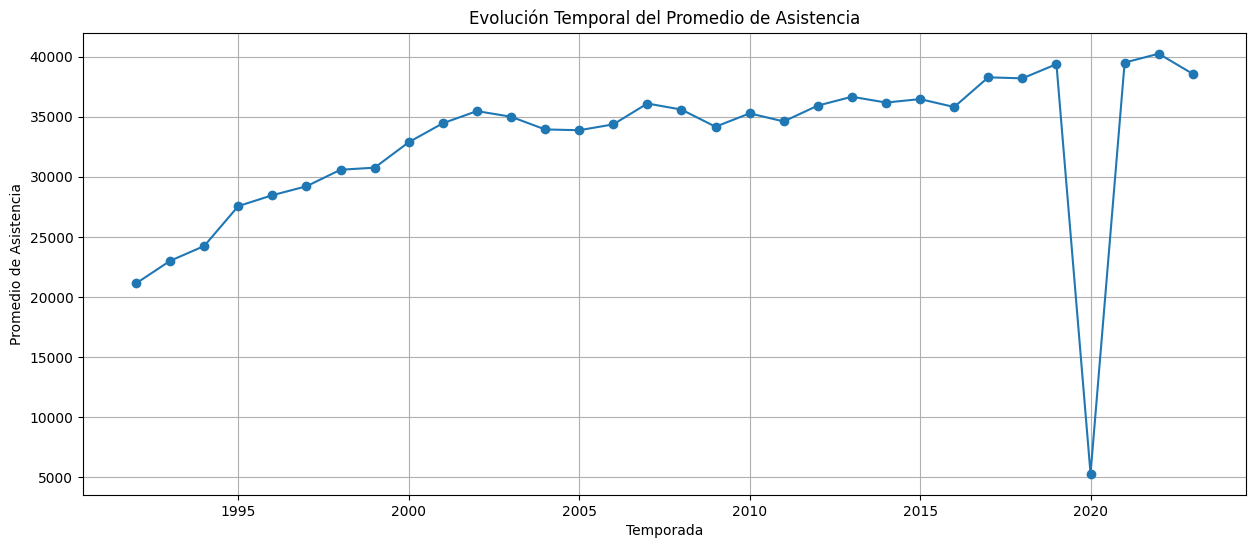

In [158]:
# Evolución temporal de la asistencia promedio
if 'Temporada' in asistencia_df.columns:
    plt.figure()
    plt.figure(figsize=(15, 6))
    asistencia_df.groupby('Temporada')['Promedio'].mean().plot(marker='o')
    plt.title('Evolución Temporal del Promedio de Asistencia')
    plt.xlabel('Temporada')
    plt.ylabel('Promedio de Asistencia')
    plt.grid(True)
    plt.show()


- Desde la década de 1990, el promedio de asistencia ha mostrado un crecimiento constante, reflejando un interés creciente en el fútbol.

- A partir de mediados de la década de 2000, el promedio se estabiliza en torno a los 35,000-40,000 espectadores.

- La caída abrupta en 2020 corresponde a la pandemia de COVID-19, cuando muchos partidos se jugaron sin público o con asistencia limitada.

- Tras esta caída, el promedio de asistencia se recupera rápidamente, volviendo a los niveles anteriores a la pandemia.

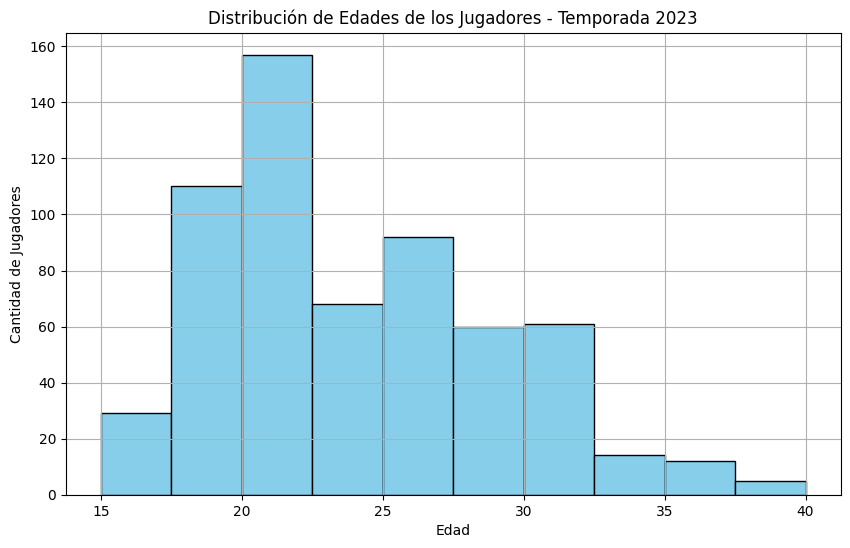

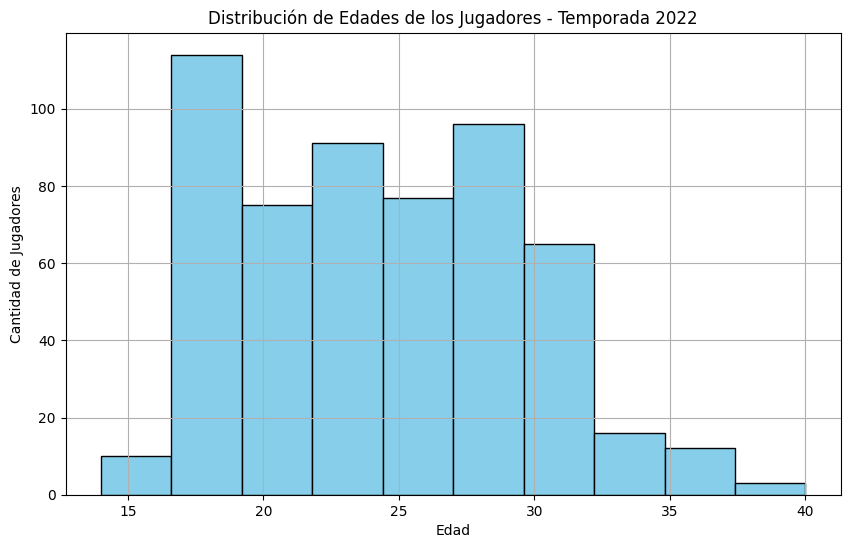

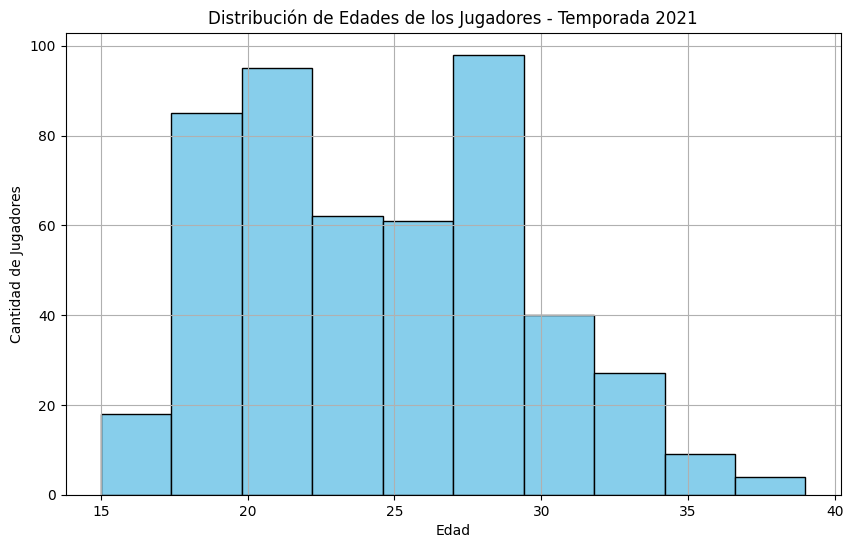

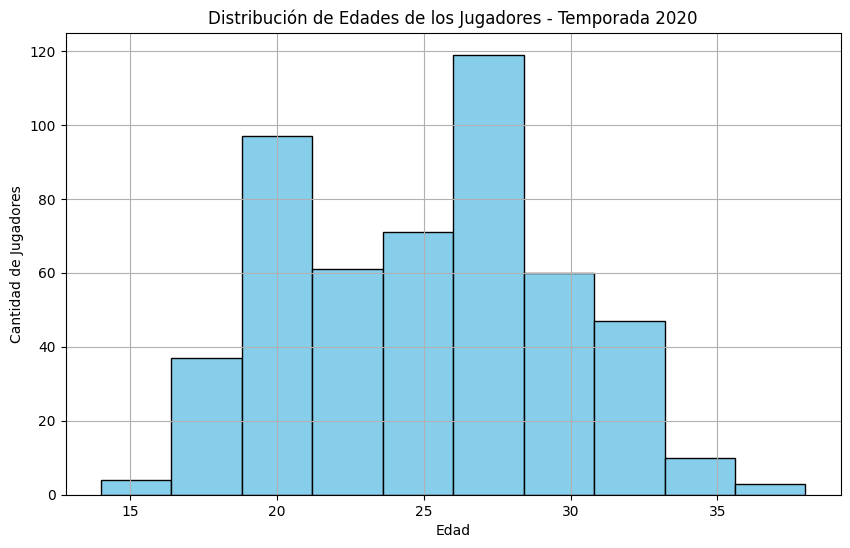

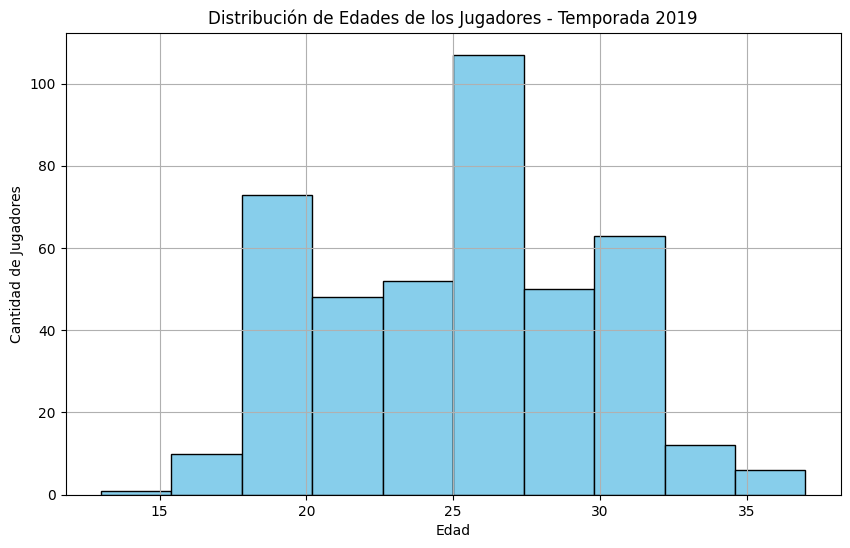

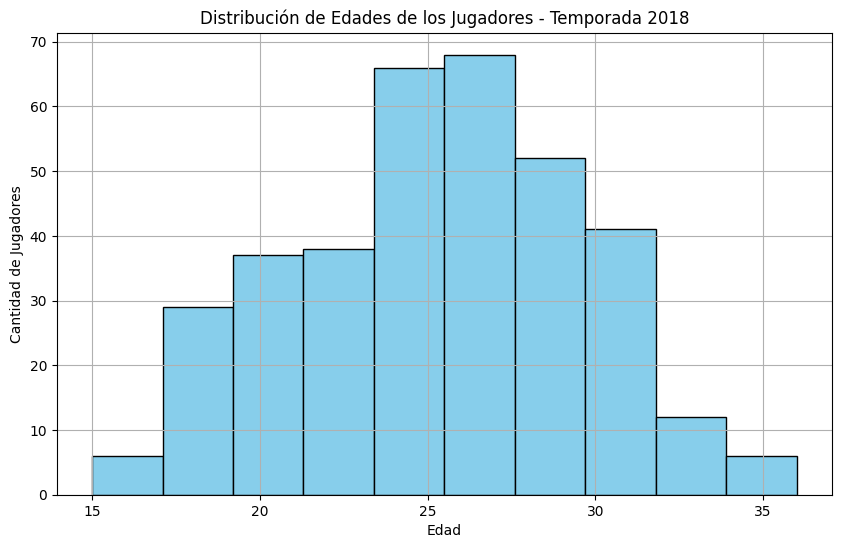

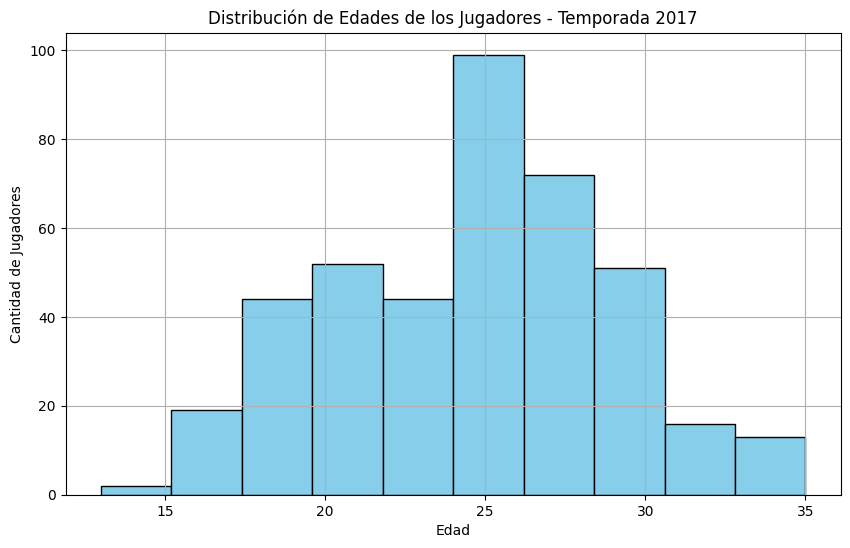

In [99]:
# Obtener las temporadas únicas
temporadas = df_jugadores['temporada'].unique()

# Distribución de edades por temporada
for temporada in temporadas:
    plt.figure(figsize=(10, 6))
    season_data = df_jugadores[df_jugadores['temporada'] == temporada]
    plt.hist(season_data['edad'].dropna(), bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de Edades de los Jugadores - Temporada {temporada}')
    plt.xlabel('Edad')
    plt.ylabel('Cantidad de Jugadores')
    plt.grid(True)
    plt.show()

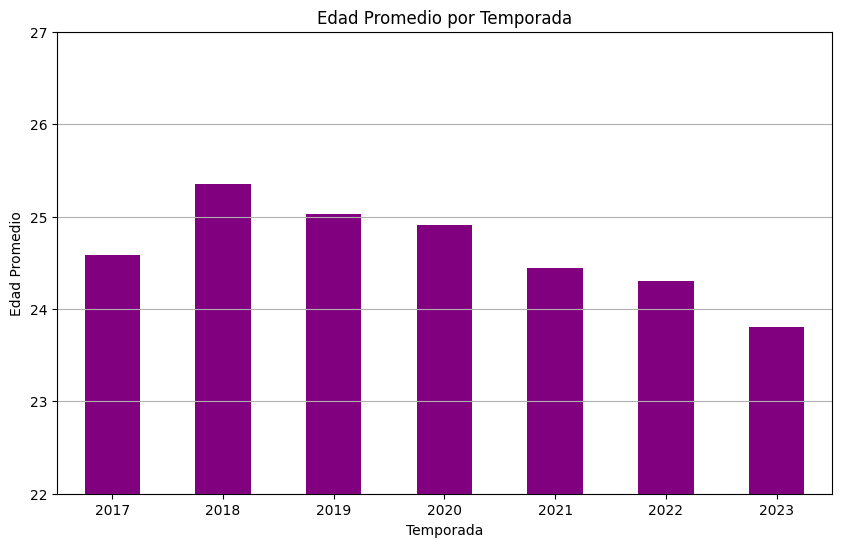

In [104]:
# Calcular la edad promedio por temporada
edad_temporada = df_jugadores.groupby('temporada')['edad'].mean()

# Crear la visualización de edad promedio por temporada
plt.figure(figsize=(10, 6))
edad_temporada.plot(kind='bar', color='purple')
plt.title('Edad Promedio por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Edad Promedio')
plt.xticks(rotation=0)
plt.ylim(22, 27)
plt.grid(axis='y')
plt.show()

- La edad promedio de los jugadores ha mostrado una ligera tendencia a la baja desde 2018, pasando de poco más de 25 años a cerca de 24 años en 2023.

- Este descenso puede reflejar un enfoque en la incorporación de jugadores más jóvenes, posiblemente para rejuvenecer las plantillas y apostar por el desarrollo a largo plazo.

- El cambio en la edad promedio podría también indicar una mayor competencia entre equipos por talentos jóvenes, o un cambio estratégico hacia jugadores con más proyección y energía.

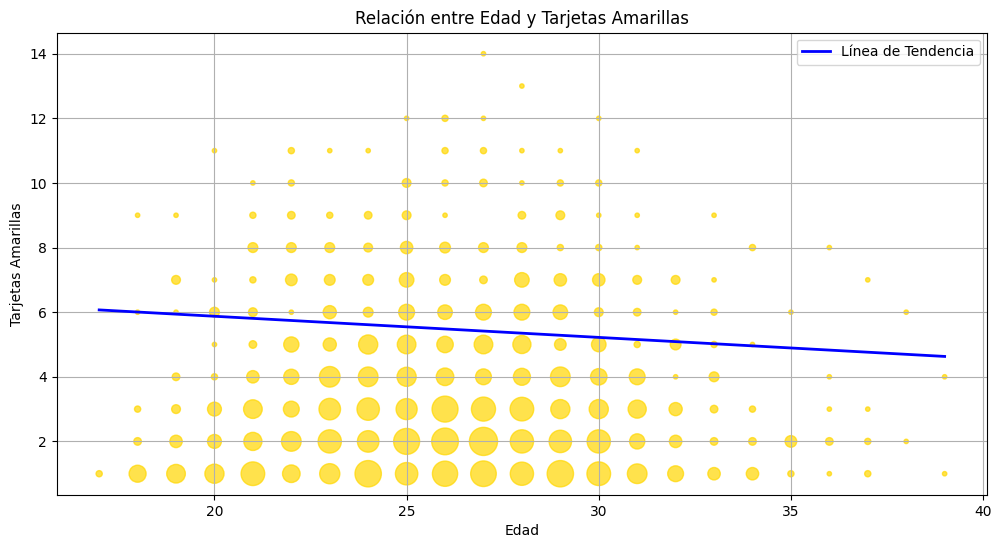

In [160]:
df_jugadores_filtrado = df_jugadores[df_jugadores['tarjetas_amarillas'] > 0]

# Calcular la frecuencia de cada combinación de edad y tarjetas amarillas
freq = df_jugadores_filtrado.groupby(['edad', 'tarjetas_amarillas']).size().reset_index(name='counts')

# Crear un scatter plot ponderado por la cantidad de valores
plt.figure(figsize=(12, 6))
plt.scatter(freq['edad'], freq['tarjetas_amarillas'], s=freq['counts'] * 10, alpha=0.7, color='gold')

# Calcular la línea de tendencia manualmente
X = freq['edad']
y = freq['tarjetas_amarillas']

# Calcular los coeficientes de la regresión lineal
coef = np.polyfit(X, y, 1)
poly1d_fn = np.poly1d(coef)

# Graficar la línea de tendencia
plt.plot(X, poly1d_fn(X), color='blue', linewidth=2, label='Línea de Tendencia')

plt.title('Relación entre Edad y Tarjetas Amarillas')
plt.xlabel('Edad')
plt.ylabel('Tarjetas Amarillas')
plt.legend()
plt.grid(True)
plt.show()

- Línea de tendencia: Indica una ligera disminución en el número de tarjetas amarillas a medida que aumenta la edad de los jugadores.

- Distribución: Los jugadores más jóvenes parecen recibir más tarjetas amarillas en general, lo que podría atribuirse a su falta de experiencia o mayor agresividad en el juego.

- Jugadores mayores: Aunque algunos jugadores mayores reciben tarjetas, en promedio, tienden a tener menos sanciones disciplinarias.

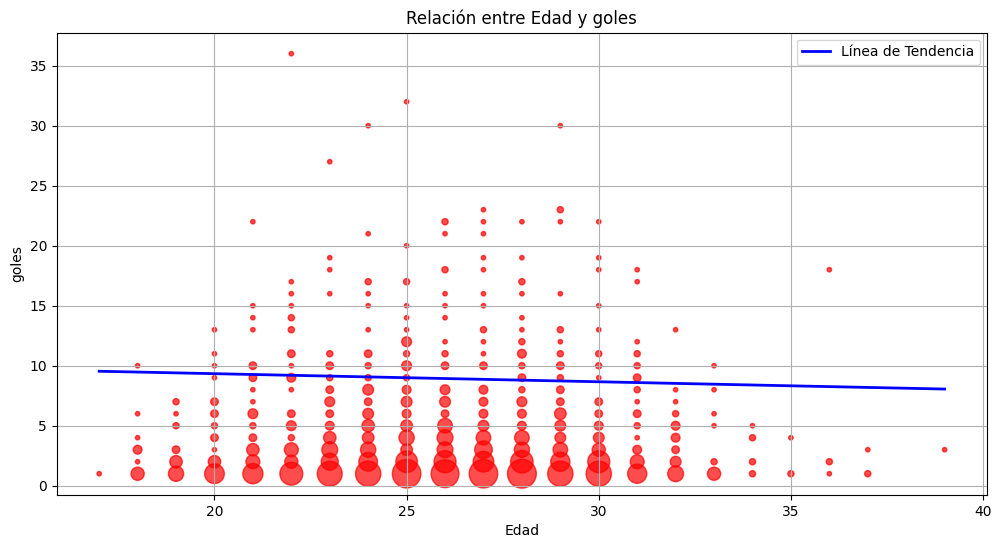

In [159]:
df_jugadores_filtrado = df_jugadores[df_jugadores['goles'] > 0]

# Calcular la frecuencia de cada combinación de edad y tarjetas amarillas
freq = df_jugadores_filtrado.groupby(['edad', 'goles']).size().reset_index(name='counts')

# Crear un scatter plot ponderado por la cantidad de valores
plt.figure(figsize=(12, 6))
plt.scatter(freq['edad'], freq['goles'], s=freq['counts'] * 10, alpha=0.7, color='red')

# Calcular la línea de tendencia manualmente
X = freq['edad']
y = freq['goles']

# Calcular los coeficientes de la regresión lineal
coef = np.polyfit(X, y, 1)
poly1d_fn = np.poly1d(coef)

# Graficar la línea de tendencia
plt.plot(X, poly1d_fn(X), color='blue', linewidth=2, label='Línea de Tendencia')

plt.title('Relación entre Edad y goles')
plt.xlabel('Edad')
plt.ylabel('goles')
plt.legend()
plt.grid(True)
plt.show()

- Línea de tendencia: Muestra una leve disminución en el número de goles anotados a medida que aumenta la edad de los jugadores, pero la pendiente es muy suave, indicando que la relación no es muy fuerte.

- Distribución: La mayoría de los goles son anotados por jugadores en el rango de 20 a 30 años, lo que coincide con el pico de rendimiento físico y técnico de muchos futbolistas.

- Jugadores jóvenes: Hay algunos jugadores jóvenes (menores de 20 años) que también logran un número notable de goles.

- Jugadores mayores: Después de los 30 años, aunque todavía hay jugadores que anotan goles, la frecuencia tiende a disminuir.

<Figure size 1000x600 with 0 Axes>

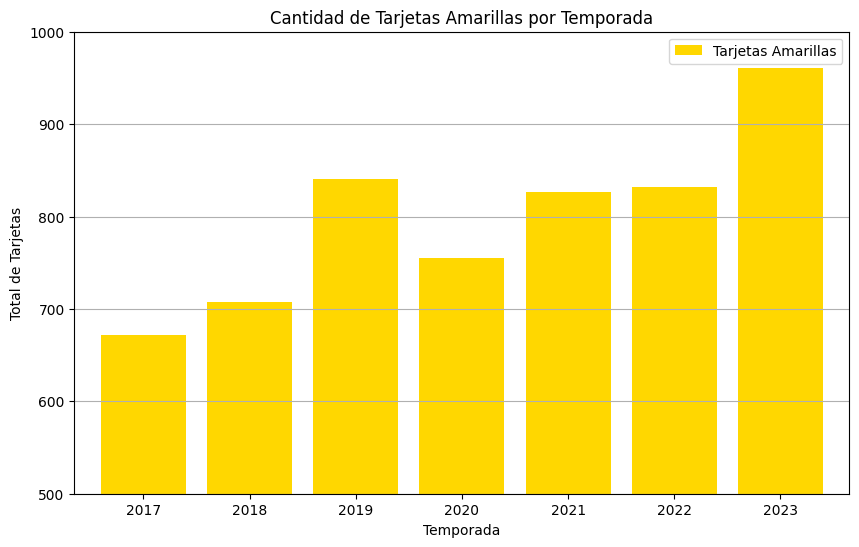

In [162]:
# Calcular la suma de tarjetas amarillas por temporada
amarillas_temporada = df_jugadores.groupby('temporada')[['tarjetas_amarillas']].sum()

# Crear una visualización de la cantidad de tarjetas amarillas por temporada
plt.figure(figsize=(10, 6))
amarillas_temporada.plot(kind='bar', color=['gold'], width=0.8)
plt.title('Cantidad de Tarjetas Amarillas por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Total de Tarjetas')
plt.xticks(rotation=0)
plt.legend(['Tarjetas Amarillas'])
plt.ylim(500, 1000)
plt.grid(axis='y')
plt.show()

- Tendencia general: Hay un aumento general en la cantidad de tarjetas amarillas emitidas, alcanzando su punto más alto en 2023.

- Descenso en 2020: Notable disminución durante la temporada 2020, posiblemente influenciada por factores externos como la pandemia de COVID-19 y la reducción en la cantidad de partidos o la ausencia de público.

- Recuperación: A partir de 2021, el número de tarjetas amarillas se incrementa nuevamente, alcanzando niveles máximos en 2023.

<Figure size 1000x600 with 0 Axes>

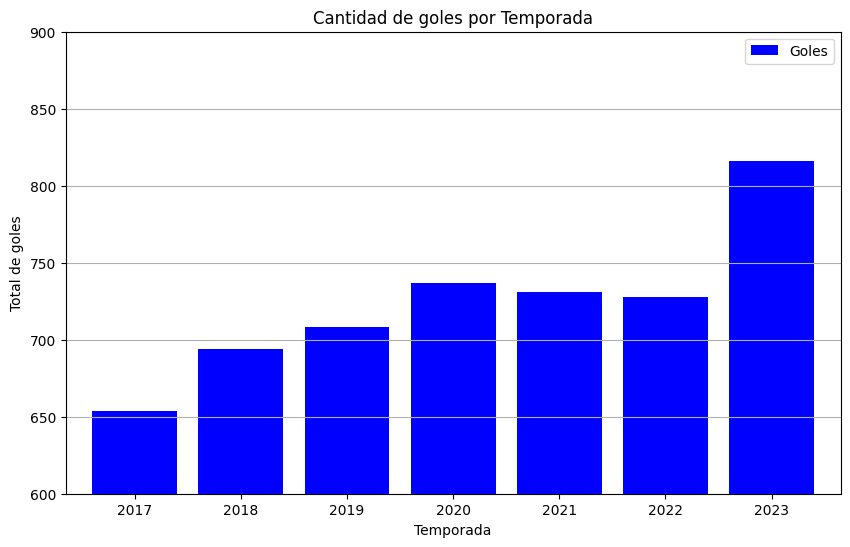

In [ ]:
# Calcular la suma de goles por temporada
goles_temporada = df_jugadores.groupby('temporada')[['goles']].sum()

# Crear una visualización de la cantidad de goles por temporada
plt.figure(figsize=(10, 6))
goles_temporada.plot(kind='bar', color=['blue'], width=0.8)
plt.title('Cantidad de goles por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Total de goles')
plt.xticks(rotation=0)
plt.legend(['Goles'])
plt.ylim(600, 900)
plt.grid(axis='y')
plt.show()

- Tendencia creciente: Hay un aumento gradual en el total de goles por temporada, con un pico notable en 2023, superando los 800 goles.

- Estabilidad: Entre 2020 y 2022, la cantidad de goles se mantiene relativamente estable, alrededor de los 750 goles por temporada.

- Incremento significativo en 2023: Este aumento puede indicar una mejora en la eficiencia ofensiva de los equipos o cambios tácticos que favorecen el juego ofensivo.

<Figure size 1200x800 with 0 Axes>

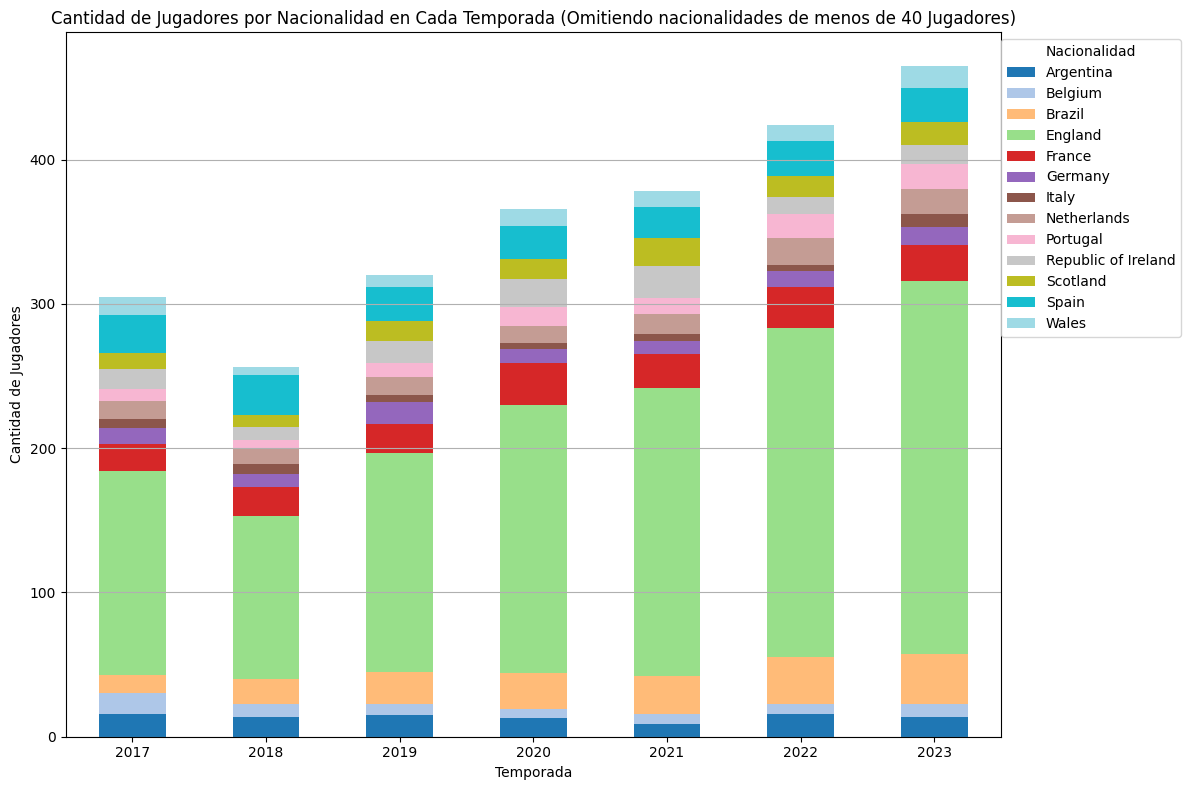

In [163]:
# Filtrar las nacionalidades con menos de 10 jugadores en total en todas las temporadas
conteo_nacionalidades_total = df_jugadores['nacionalidad'].value_counts()
nacionalidades_filtradas = conteo_nacionalidades_total[conteo_nacionalidades_total >= 40].index

# Filtrar el dataset para mantener solo las nacionalidades con al menos 10 jugadores
datos_filtrados = df_jugadores[df_jugadores['nacionalidad'].isin(nacionalidades_filtradas)]

# Calcular la cantidad de jugadores por nacionalidad para cada temporada en el dataset filtrado
conteo_nacionalidades_por_temporada = datos_filtrados.groupby(['temporada', 'nacionalidad']).size().unstack(fill_value=0)

# Crear una visualización de la cantidad de jugadores por nacionalidad en cada temporada con el dataset filtrado
plt.figure(figsize=(12, 8))
conteo_nacionalidades_por_temporada.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Cantidad de Jugadores por Nacionalidad en Cada Temporada (Omitiendo nacionalidades de menos de 40 Jugadores)')
plt.xlabel('Temporada')
plt.ylabel('Cantidad de Jugadores')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Nacionalidad')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

- Dominancia de jugadores ingleses: Inglaterra tiene consistentemente la mayor cantidad de jugadores en cada temporada, reflejando la base local del fútbol en la liga.

- Aumento de jugadores internacionales: Se observa un crecimiento en la cantidad de jugadores de nacionalidades como España, Francia, y Alemania, indicando una mayor internacionalización de la liga.

- Estabilidad en otras nacionalidades: Países como Brasil, Argentina, y Portugal mantienen una presencia constante, reflejando la calidad y popularidad de sus jugadores.

- Crecimiento general: La cantidad total de jugadores por temporada ha aumentado, lo que podría indicar la expansión de las plantillas o un mayor número de equipos en competencia.